In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from preprocessing import get_df

filename = 'RNN_4_conversations.csv'
df,data_path = get_df(filename)

print(df.columns)
print(df.shape)
print(df.describe())
df.head(10)

Index(['Unnamed: 0', 'ConvId', 'UserMessages', 'AssResponses'], dtype='object')
(6771, 4)
        Unnamed: 0
count  6771.000000
mean   3385.000000
std    1954.763669
min       0.000000
25%    1692.500000
50%    3385.000000
75%    5077.500000
max    6770.000000


Unnamed: 0                                    ConvId  \
0           0  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
1           1  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
2           2  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
3           3  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
4           4  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
5           5  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
6           6  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
7           7  dlg-008c75b7-460f-430f-adcf-bd5dcc46854e   
8           8  dlg-00d882a3-255d-4e15-99cb-f068046d6eb2   
9           9  dlg-00d882a3-255d-4e15-99cb-f068046d6eb2   

                                        UserMessages  \
0                                                NaN   
1  Yeah, I'd like to get a rack of ribs. What kin...   
2  Yeah. Of course, I want the barbecue sauce and...   
3  No, I'd like to get a salad with that. No toma...   
4  Can I get a potato, a baked potato? A Diet Cok...   
5                                 That sounds great.   
6          No, I think that'll do it for me. Thanks.   
7                                         Thank you.   
8                                                NaN   
9  Hi, I had to step away for minutes. What was I...   

                                        AssResponses  
0  Hi. How can I help you? What would you like to...  
1  With rack of ribs, I would suggest Barbecue sa...  
2                       Would you like to add extra?  
3  Is there anything else you would like to add l...  
4  Baked potato and diet coke has been added to t...  
5      Is there anything else you would like to add?  
6  Okay, I have your personal details on file, yo...  
7                                               Bye.  
8                       Hello, How can I assist you?  
9                    You were ordering Italian food?

In [13]:
### distribution of char lengths for user messages AND ass messages: 
df["UserMessages"].str.len()

df["UserMessages"].str.len().value_counts()
# df["UserMessages"].str.len().value_counts().plot(kind='bar')


df["UserMessages"].str.len().value_counts().sort_values(ascending=False).head(20)

UserMessages
4.0     347
10.0    304
16.0    200
15.0    154
19.0    147
8.0     141
21.0    133
14.0    127
20.0    126
18.0    112
5.0     109
22.0     93
34.0     83
17.0     81
26.0     80
13.0     78
27.0     77
24.0     77
29.0     72
35.0     72
Name: count, dtype: int64

<Axes: xlabel='UserMessages'>

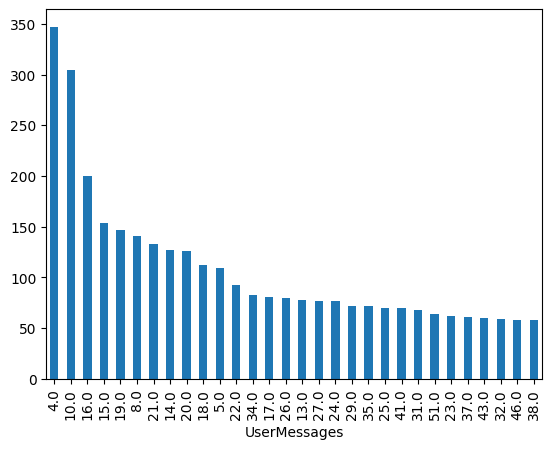

In [16]:
df["UserMessages"].str.len().value_counts().sort_values(ascending=False).head(30).plot(kind='bar')
# df["UserMessages"].str.len().value_counts().sort_values(ascending=False).head(50).hist()

<Axes: xlabel='AssResponses'>

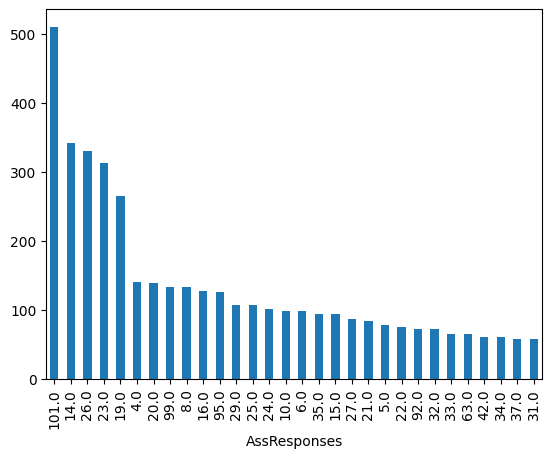

In [17]:
df["AssResponses"].str.len()

df["AssResponses"].str.len().value_counts()
# df["UserMessages"].str.len().value_counts().plot(kind='bar')

df["AssResponses"].str.len().value_counts().sort_values(ascending=False).head(20)
df["AssResponses"].str.len().value_counts().sort_values(ascending=False).head(30).plot(kind='bar')

AssResponses
6.0     847
19.0    695
2.0     582
5.0     536
1.0     469
3.0     437
4.0     416
7.0     323
18.0    254
8.0     246
9.0     202
12.0    181
10.0    145
11.0    136
13.0    112
14.0    100
15.0     98
17.0     85
16.0     66
20.0     52
Name: count, dtype: int64


<Axes: xlabel='AssResponses'>

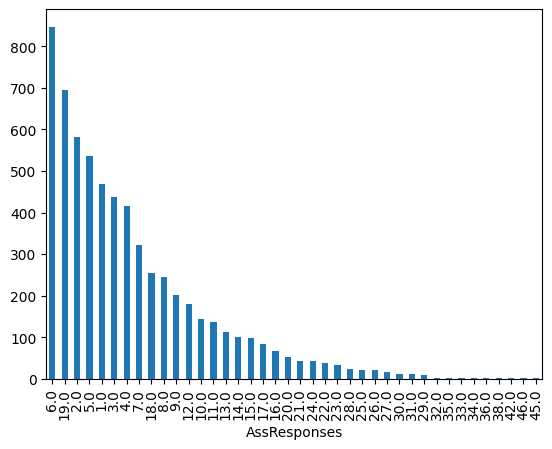

In [19]:
### Token counts

print(df['AssResponses'].str.split(' ').str.len().value_counts().sort_values(ascending=False).head(20))
df['AssResponses'].str.split(' ').str.len().value_counts().sort_values(ascending=False).head(40).plot(kind='bar')

UserMessages
3.0     722
1.0     712
2.0     579
4.0     424
5.0     367
7.0     304
10.0    293
8.0     279
9.0     278
6.0     273
11.0    243
12.0    173
13.0    143
14.0    126
17.0    109
16.0    108
15.0    101
19.0     76
18.0     75
20.0     70
Name: count, dtype: int64


<Axes: xlabel='UserMessages'>

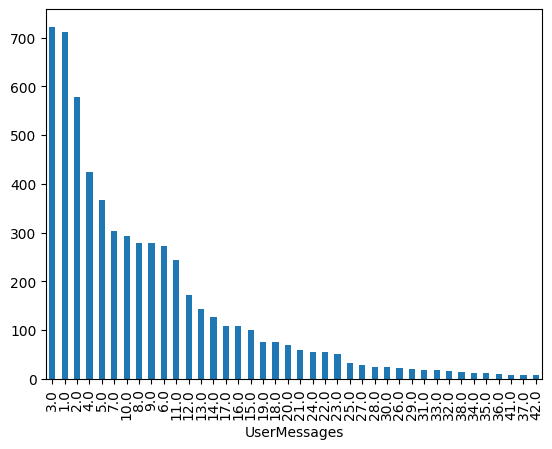

In [21]:
print(df['UserMessages'].str.split(' ').str.len().value_counts().sort_values(ascending=False).head(20))
df['UserMessages'].str.split(' ').str.len().value_counts().sort_values(ascending=False).head(40).plot(kind='bar')

In [ ]:
### ---> are there any rows that should be removed ??


In [ ]:
df = df[df['UserMessages'].notna()] # --> we are removing rows where we don't have user messages ("an input for the model")
df["UserMessages"].value_counts().sort_values(ascending=False).head(20)

In [25]:
### How many conversations are there where the user has finished the conversation??

print(df[df['AssResponses'].isna()])

print(type(df['AssResponses'].iloc[47]))
print(df['AssResponses'].iloc[47])
print([char for char in str(df['AssResponses'].iloc[47])])

<class 'float'>
nan
['n', 'a', 'n']
